## Agent & Tools

### Intro
In LangChain, an “Agent” is an AI entity that interacts with various “Tools” to perform tasks or answer queries. Tools are essentially functions that extend the agent’s capabilities by allowing it to perform specific actions, like retrieving the current time or accessing an external database.


The basic code to create an agent in LangChain involves defining tools, loading a prompt template, and initializing a language model. The agent is then executed using an AgentExecutor , which manages the interaction between the agent and the tools. This setup allows for dynamic and context-aware responses, enabling the AI to reason and take actions in a structured manner.

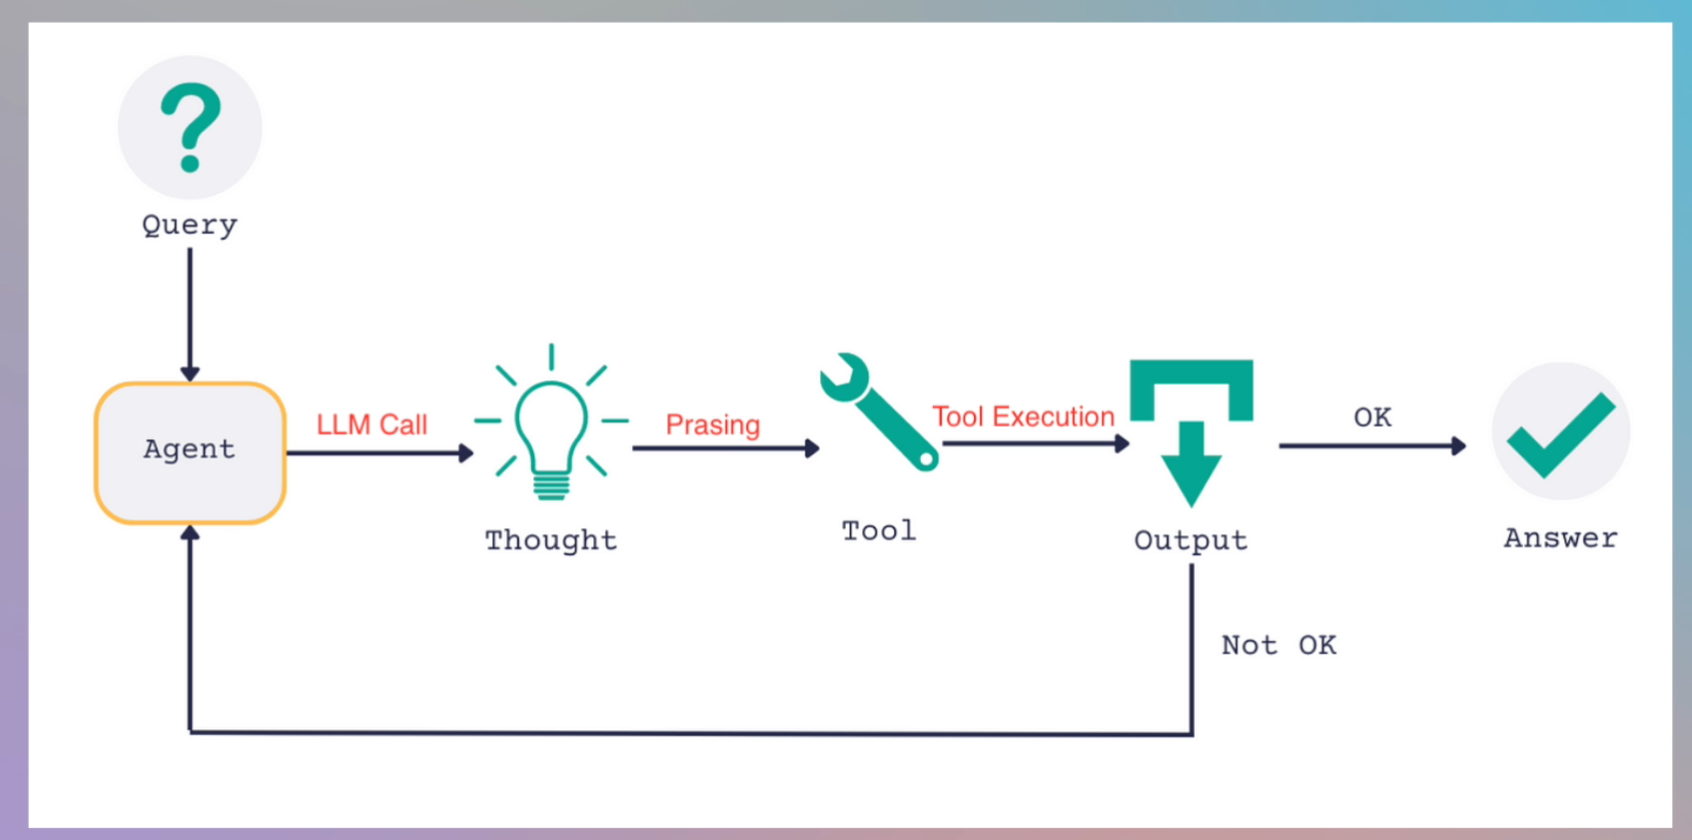

 Agents are systems that use LLMs as reasoning engines to determine which actions to take and the inputs necessary to perform the action. After executing actions, the results can be fed back into the LLM to determine whether more actions are needed, or whether it is okay to finish. This is often achieved via tool-calling.

In [1]:
from dotenv import load_dotenv
from langchain import hub
from langchain.agents import (
    AgentExecutor,
    create_react_agent,
)
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI

# Load environment variables from .env file
load_dotenv()

True

- _load_dotenv :_ This function loads environment variables from a .env file into the system’s environment variables. It’s useful for keeping sensitive information like API keys out of your code.
- _hub :_ Allows interaction with the LangChain hub for pulling templates and other assets.
- _AgentExecutor and create_react_agent_ : Classes and functions used to create and manage agents in LangChain.
- _Tool_ : A class from LangChain that represents a tool the agent can use. In this case, it wraps the get_current_time() function.
- _ChatOpenAI_ : A class for interfacing with OpenAI's GPT models.

### ReAct = Reason and Action

**Define a Tool Function:** This function _get_current_time_ returns the current time formatted as H:MM AM/PM. The function imports the _datetime_ module, gets the current time, and then formats it.

In [ ]:
# Define a very simple tool function that returns the current time
def get_current_time(*args, **kwargs):
    """Returns the current time in H:MM AM/PM format."""
    import datetime

    now = datetime.datetime.now()
    return now.strftime("%I:%M %p")  # Format time in H:MM AM/PM format

**Define Tools:** This creates a list of tools available to the agent. In this case, there’s only one tool named “_Time_”, which uses the _get_current_time_ function to return the current time.

In [3]:
# List of tools available to the agent
tools = [
    Tool(
        name="Time",  # Name of the tool
        func=get_current_time,  # Function that the tool will execute
        # Description of the tool
        description="Useful for when you need to know the current time",
    ),
]

**Pull Prompt Template:** This pulls a prompt template named “react” from the LangChain hub, which is designed to help the agent reason and take actions.

In [4]:
# Pull the prompt template from the hub
# https://smith.langchain.com/hub/hwchase17/react
prompt = hub.pull("hwchase17/react")

In [9]:
prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}

In [5]:
llm = ChatOpenAI(
    model="gpt-4o", temperature=0
)

**Create ReAct Agent:** This creates a ReAct agent using the specified model (_llm_), tools (_tools_), and prompt template (_prompt_). The _stop_sequence=True_ parameter ensures that the agent stops processing when it reaches a predefined stopping point in the conversation.

In [6]:
agent = create_react_agent(
    llm=llm,
    tools=tools,
    prompt=prompt,
    stop_sequence=True,
)


**Create Agent Executor:** This creates an _AgentExecutor_ that manages the interaction between the agent and the tools. The _verbose =True_ parameter allows detailed logging of the agent’s actions.

In [7]:
agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

**Run the Agent:** This runs the agent with a test query: _“What time is it?”_. The agent will use the Time tool to get the current time and respond.

In [8]:
response = agent_executor.invoke({"input": "What time is it?"})
print("response:", response)



> Entering new AgentExecutor chain...
To answer this question, I need to find out the current time. 

Action: Time
Action Input: None12:52 PMI now know the final answer.
Final Answer: The current time is 12:52 PM.

> Finished chain.
response: {'input': 'What time is it?', 'output': 'The current time is 12:52 PM.'}


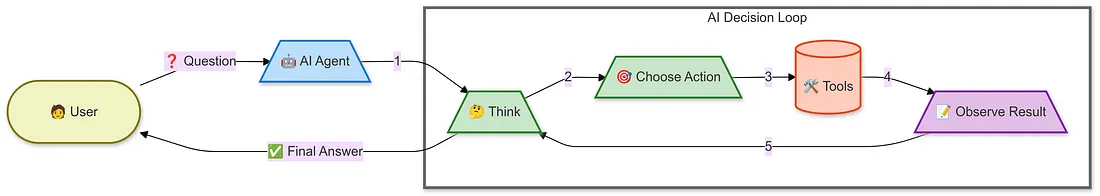

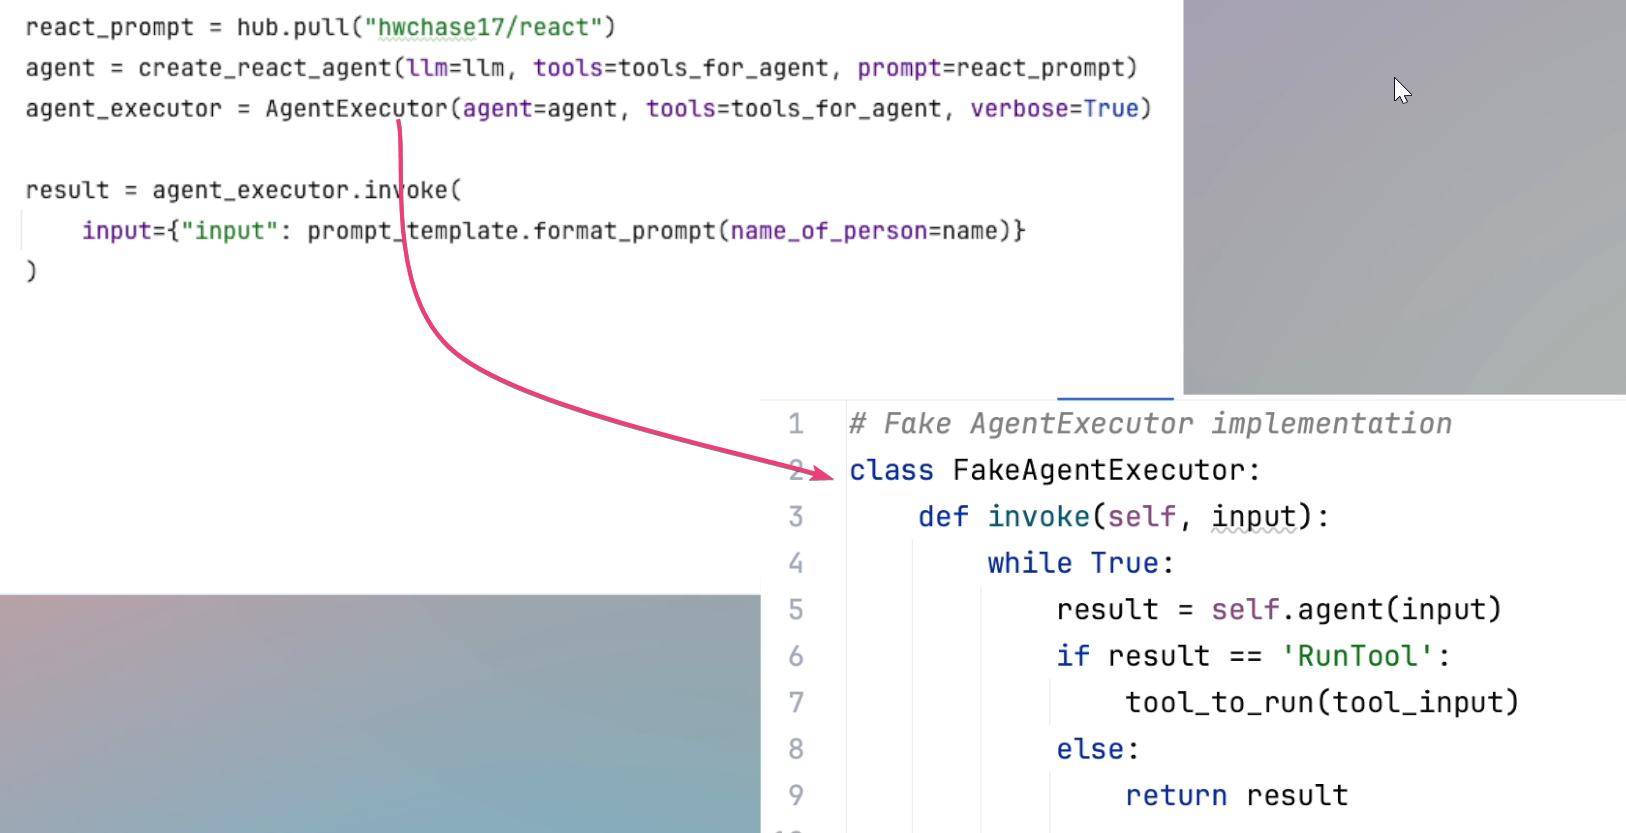

```python
from dotenv import load_dotenv
from langchain import hub
from langchain.agents import (
    AgentExecutor,
    create_react_agent,
)
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI

# Load environment variables from .env file
load_dotenv()


# Define a very simple tool function that returns the current time
def get_current_time(*args, **kwargs):
    """Returns the current time in H:MM AM/PM format."""
    import datetime  # Import datetime module to get current time

    now = datetime.datetime.now()  # Get current time
    return now.strftime("%I:%M %p")  # Format time in H:MM AM/PM format


# List of tools available to the agent
tools = [
    Tool(
        name="Time",  # Name of the tool
        func=get_current_time,  # Function that the tool will execute
        # Description of the tool
        description="Useful for when you need to know the current time",
    ),
]

# Pull the prompt template from the hub
# ReAct = Reason and Action
# https://smith.langchain.com/hub/hwchase17/react
prompt = hub.pull("hwchase17/react")

# Initialize a ChatOpenAI model
llm = ChatOpenAI(
    model="gpt-4o-mini", temperature=0
)

# Create the ReAct agent using the create_react_agent function
agent = create_react_agent(
    llm=llm,
    tools=tools,
    prompt=prompt,
    stop_sequence=True,
)

# Create an agent executor from the agent and tools
agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
)

# Run the agent with a test query
response = agent_executor.invoke({"input": "What time is it?"})

# Print the response from the agent
print("response:", response)
```

#### Other resources:

1. https://medium.com/@charikshith.work/building-react-agent-from-scratch-a-step-by-step-tutorial-2450a7248fb3